<a href="https://colab.research.google.com/github/samjoshuadud/google-collab-appdev/blob/main/Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Temperature prediction on a place using the line of latitude.**

- Armojallas, Caleb Joshua
- II-BCSAD

Importing of Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Reading the .CSV file

In [3]:
data = pd.read_csv("Cities2.csv")

Descibe the Statistics of Data

In [41]:
data.describe()

,latitude,longitude,temperature
count,213.000000,213.000000,213.000000
mean,47.499906,15.374319,9.497840
std,6.730961,13.068014,3.561231
min,36.130000,-9.140000,-2.200000
25%,42.220000,5.380000,7.190000
50%,47.580000,16.180000,8.880000
75%,52.050000,25.620000,11.190000
max,67.850000,41.930000,18.670000


Displaying of the first 5 rows

In [5]:
data.head(10)

,city,country,latitude,longitude,temperature
0,Aalborg,Denmark,57.03,9.92,7.52
1,Aberdeen,United Kingdom,57.17,-2.08,8.10
2,Abisko,Sweden,63.35,18.83,0.20
3,Adana,Turkey,36.99,35.32,18.67
4,Albacete,Spain,39.00,-1.87,12.62
5,Algeciras,Spain,36.13,-5.47,17.38
6,Amiens,France,49.90,2.30,10.17
7,Amsterdam,Netherlands,52.35,4.92,8.93
8,Ancona,Italy,43.60,13.50,13.52
9,Andorra,Andorra,42.50,1.52,9.60


Displaying Columns

In [6]:
data.columns

Index(['city', 'country', 'latitude', 'longitude', 'temperature'], dtype='object')

Getting the numbers of rows and columns of the datasets from the .CSV file

In [7]:
data.shape

(213, 5)

Let's take the data from the column temperature and latitude

In [8]:
new_data = data[['latitude', 'temperature']]

new_data.sample(5)

,latitude,temperature
201,59.86,4.17
54,40.20,11.16
120,49.08,7.43
32,43.25,11.41
88,53.27,10.00


* Store into X the 'temperature' as np.array
* Store into Y the 'latitutde' as np.array
* Viewing the shape of X
* Viewing the shape of Y

In [11]:
X = np.array(new_data[['latitude']])
Y = np.array(new_data[['temperature']])

print(X.shape)
print(Y.shape)

(213, 1)
(213, 1)


Plotting a graph X vs Y

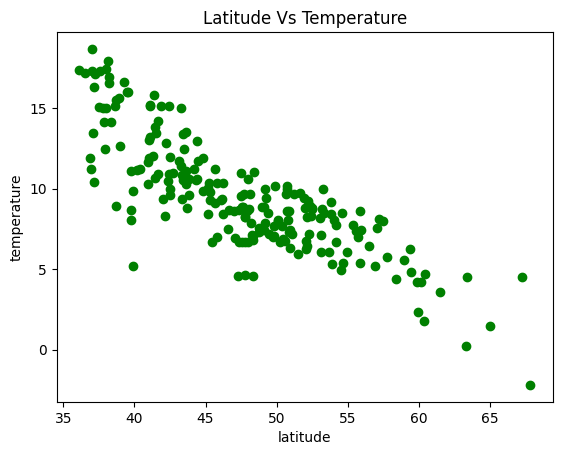

In [40]:
plt.scatter(X,Y,color="green")
plt.title('Latitude Vs Temperature')
plt.xlabel('latitude')
plt.ylabel('temperature')
plt.show()

Storing into X,Y the 'latitude','temperature' as np.array

In [16]:
X = np.array(new_data[['latitude']])
Y = np.array(new_data[['temperature']])

print(X.shape)
print(Y.shape)

(213, 1)
(213, 1)


Splitting the data into training and testing sets

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.3)
print("Splitting data...")

Splitting data...


Importing the LinearRegression class/module, instantiate it, and calling the fit() method

Train the algorithm


In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(X_train, Y_train)

Make Predictions on the test data

In [24]:
Y_pred = model.predict(X_test)

Comparing the actual output values

In [25]:
df = pd.DataFrame({'Actual Values': Y_test.flatten(), 'Predicted Values': Y_pred.flatten()})
df

,Actual Values,Predicted Values
0,9.60,11.794743
1,11.21,10.413924
2,11.24,11.049539
3,3.59,3.465992
4,7.00,5.999686
...,...,...
59,9.41,7.674203
60,17.38,14.587066
61,15.10,13.491178
62,7.66,8.353654


In [32]:
while True:
  name = input('Enter Latitude (or "quit" to quit): ')

  if name == 'quit': break

  name = float(name)
  Sdata = model.predict([[name]])
  print("The Predicted Temp is : ", Sdata)

Enter Latitude (or "quit" to quit): 57
The Predicted Temp is :  [[5.43859109]]
Enter Latitude (or "quit" to quit): quit


Comparing the actual and predicted values using bar graph

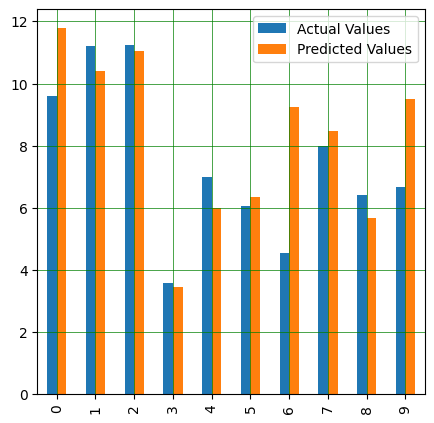

In [35]:
dfl = df.head(10)
dfl.plot(kind='bar', figsize=(5,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

Plot the prediction values

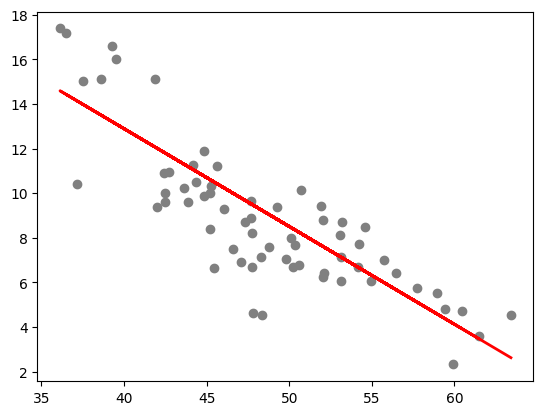

In [36]:
plt.scatter(X_test, Y_test, color='gray')
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.show()

Getting the MAE, MSE, and RMSE; Measures of accuracy

In [39]:
from sklearn import metrics
print('Mean Absolute Error', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error 1.5206750617232718
Mean Squared Error 3.5096653177607924
Root Mean Squared Error 1.873410077308434
